In [ ]:
import numpy as np
import pandas as pd
import random
import cv2
import matplotlib.pyplot as plt

In [ ]:
class k_means:
    def __init__(self, no_of_clusters, data):
        self.clusters = no_of_clusters
        self.data = data
        flat_data = data.reshape(-1, 3)
        random_indices = np.random.choice(len(flat_data), no_of_clusters, replace=False)
        self.initial_centroids = flat_data[random_indices].astype(np.float64)
        self.cluster_assignments = np.empty([data.shape[0], data.shape[1]], dtype=int)

    def euclidean_distance(self, arr1, arr2):
        return np.linalg.norm(arr1 - arr2)

    def assign_clusters(self):
        self.distances = np.zeros((self.clusters, self.data.shape[0], self.data.shape[1]))
        for i in range(self.clusters):
            for j in range(self.data.shape[0]):
                for k in range(self.data.shape[1]):
                    dist = self.euclidean_distance(self.data[j, k], self.initial_centroids[i])
                    self.distances[i, j, k] = dist
        self.cluster_assignments = np.argmin(self.distances, axis=0)

    def update_centroids(self):
        flat_data = self.data.reshape(-1, 3)
        flat_assignments = self.cluster_assignments.flatten()
        for i in range(self.clusters):
            cluster_pixels = flat_data[flat_assignments == i]
            if len(cluster_pixels) > 0:
                self.initial_centroids[i] = cluster_pixels.mean(axis=0)

    def k_means(self, max_iter=100):
        for i in range(max_iter):
            prev_assignments = self.cluster_assignments.copy()
            self.assign_clusters()
            self.update_centroids()
            if np.array_equal(prev_assignments, self.cluster_assignments):
                print(f"Converged at iteration {i}")
                break

    def generate_image(self):
        flat_data = self.data.reshape(-1, 3).copy()
        flat_assignments = self.cluster_assignments.flatten()
        for i in range(self.clusters):
            flat_data[flat_assignments == i] = self.initial_centroids[i]
        return flat_data.reshape(self.data.shape).astype(np.uint8)


Converged at iteration 99


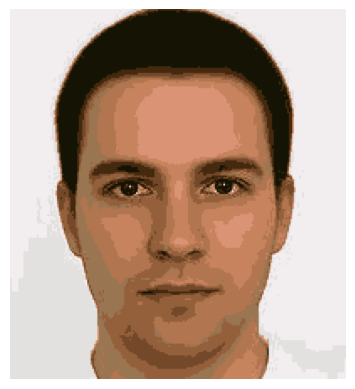

In [ ]:
image = cv2.imread('face.jpg')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

model = k_means(10, img)
model.k_means()
new_img = model.generate_image()

plt.imshow(new_img)
plt.axis('off')
plt.show()


Converged at iteration 10


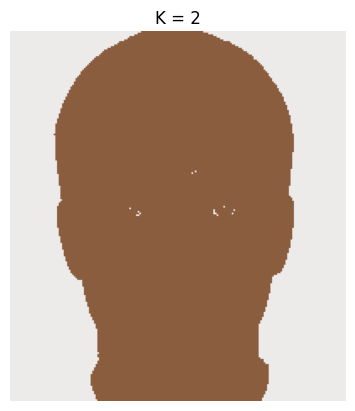

Converged at iteration 11


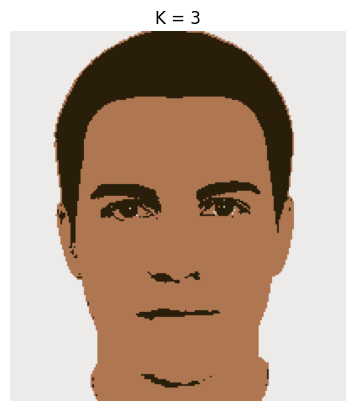

Converged at iteration 21


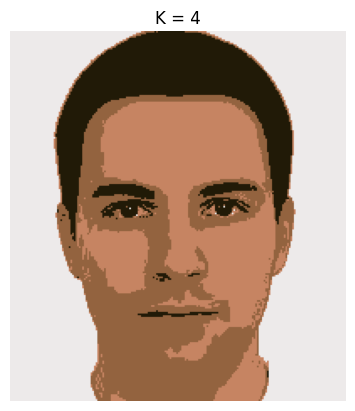

Converged at iteration 19


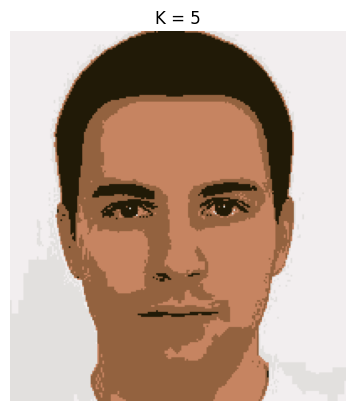

Converged at iteration 39


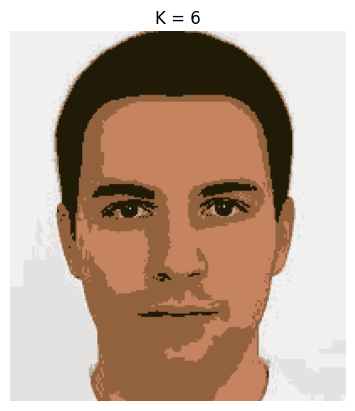

Converged at iteration 25


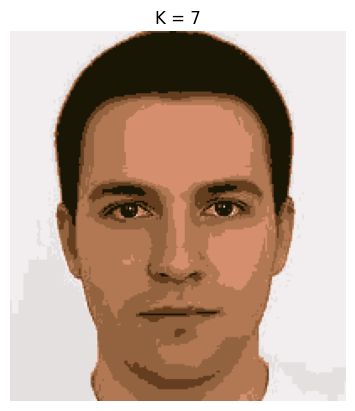

Converged at iteration 29


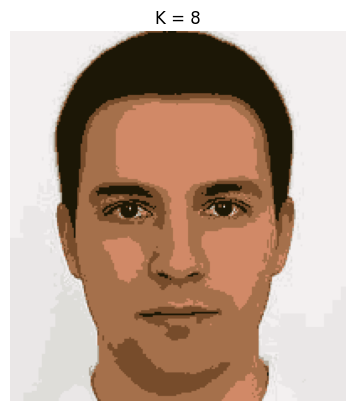

Converged at iteration 49


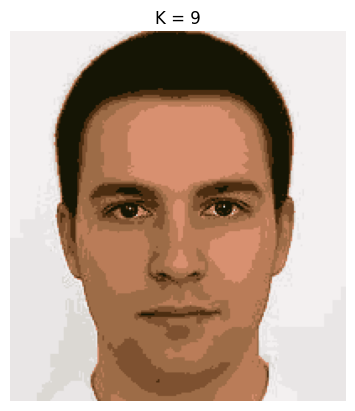

Converged at iteration 30


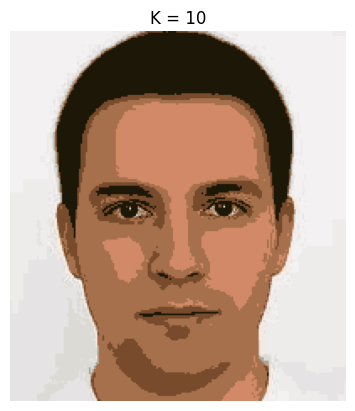

Converged at iteration 66


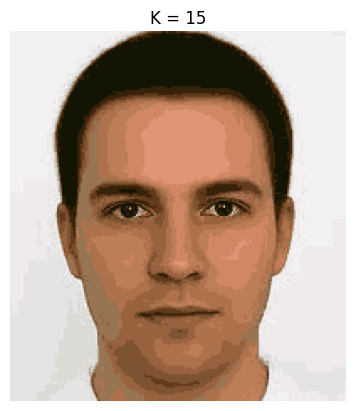

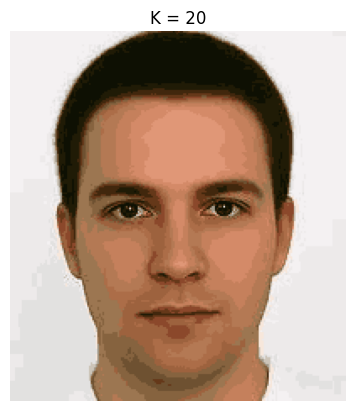

In [ ]:
lst = [2,3,4,5,6,7,8,9,10,15,20]
for k in lst:
  model = k_means(k, img)
  model.k_means()
  new_img = model.generate_image()

  plt.figure()
  plt.imshow(new_img)
  plt.axis('off')
  plt.title(f'K = {k}')
  plt.show()